<a href="https://colab.research.google.com/github/chandhinipj/CartPole-V0-ReinforcementLearning/blob/main/PredictionChallenge3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skeleton Code for Prediction Challenge 3
Below is partial code to get you started on prediction challenge 3. You need to select values for the parameters that have question marks.

In [2]:
!pip install keras-rl2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# load the gym module
import gym
import matplotlib.pyplot as plt
# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam

ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [5]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy  # import the policy
from rl.agents.dqn import DQNAgent      # import the DQN agent

In [7]:
# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
# add extra layers here
model.add(Dense(16, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(128, activation='relu'))

model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
memory = SequentialMemory(limit=100000, window_length=1)

# define the policy
policy =  LinearAnnealedPolicy(inner_policy=EpsGreedyQPolicy(), 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.1, 
                               value_test=.05,
                               nb_steps=10000)


# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=100,
               target_model_update=1e-2, 
               policy=policy) 

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)



/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...
   22/10000: episode: 1, duration: 0.083s, episode steps:  22, steps per second: 264, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.545 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   50/10000: episode: 2, duration: 0.020s, episode steps:  28, steps per second: 1396, episode reward: 28.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   67/10000: episode: 3, duration: 0.012s, episode steps:  17, steps per second: 1371, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.294 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   96/10000: episode: 4, duration: 0.021s, episode steps:  29, steps per second: 1403, episode reward: 29.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.483 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  116/10000: episode: 5, duration: 0.726s, episode steps:  20, steps per second:  28, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.650 [0.000, 1.000],  loss: 0.509598, mae: 0.536816, mean_q: 0.087398, mean_eps: 0.990280
  137/10000: episode: 6, duration: 0.132s, episode steps:  21, steps per second: 160, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.571 [0.000, 1.000],  loss: 0.472393, mae: 0.531854, mean_q: 0.134183, mean_eps: 0.988660
  166/10000: episode: 7, duration: 0.199s, episode steps:  29, steps per second: 146, episode reward: 29.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.552 [0.000, 1.000],  loss: 0.423490, mae: 0.537997, mean_q: 0.201948, mean_eps: 0.986410
  195/10000: episode: 8, duration: 0.170s, episode steps:  29, steps per second: 171, episode reward: 29.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.552 [0.000, 1.000],  loss: 0.384691, mae: 0.551385, mean_q: 0.277871, mean_eps: 0

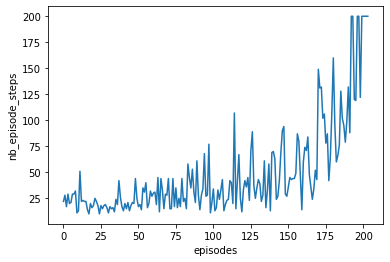

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [11]:
# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)